    NAMA  : Rahmat Syauqi Islami
    NIM   : 09011181721023
    KELAS : SK5A
    MK    : KECERDASAN BUATAN
    Dosen : Prof.Dr.Ir. Siti Nurmaini,M.T.

# SISTEM PENDUKUNG KEPUTUSAN PERAMALAN CUACA DENGAN MENGGUNAKAN LOGIKA FUZZY MAMDANI

### Definisi Sistem Pendukung Keputusan
Suatu informasi berbasis komputer yang menghasilkan berbagai alternatif keputusan untuk
membantu manajemen dalam menangani berbagai permasalahan yang terstruktur ataupun tidak
terstruktur dengan menggunakan data dan model. Penggunaan model ini berkaitan dengan sifat
permasalahan yang harus dipecahkan pemakai, yaitu semi terstruktur atau tidak terstruktur. Jadi
semakin banyak perbendaharaan yang dimiliki oleh sistem, maka alternatif keputusan yang dapat
diciptakannya juga akan semakin kaya dengan memanfaatkan komputer sebagai media.


### Tujuan Sistem Pendukung Keputusan
Tujuan Sistem pendukung Keputusan dalam proses pengambilan keputusan adalah :
1. Membantu menjawab masalah semi terstruktur
2. Membantu manajer dalam mengambil keputusan, bukan menggantikannya
3. Fokus pada keputusan yang efektif, bukan keputusan yang efisien

In [14]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [15]:
suhu = np.arange(24,35,1)
tekanan = np.arange(1008,1015,1)
kelembaban = np.arange(58,86,1)

  Dalam program ini, fuzzy logic memiliki input dan ouput. Input yang di gunakan ada 3 yaitu suhu,tekanan, dan kelembaban. untuk ouput yang digunakan ada 1 yaitu cuaca. Numpy merupakan singkatan dari numerical python, adalah module yang di khususkan untuk menganalisa data dan melakukan secara numerik disimbolkan dalam bentuk array(susunan).

# Fuzzifikasi

In [16]:
suhu = ctrl.Antecedent(np.arange(24,37,1), 'suhu')
tekanan = ctrl.Antecedent(np.arange(1008,1015,1), 'tekanan')
kelembaban = ctrl.Antecedent(np.arange(58,86,1), 'kelembaban')

cuaca = ctrl.Consequent(np.arange(1,65,1), 'cuaca')

1. variabel input suhu memiliki rentang nilai dari 24 s.d 37.
2. variabel input tekanan memiliki rentang nilai 1008 s.d 1015.
3. variabel input kelembaban memiliki rentang nilai 58 s.d 86.
4. variabel output cuaca memiliki rentang nilai 1 s.d 65 dan juga mempunyai nilai rata-rata, dimana nilai tersebut dapat menyatakan kondisi perkiraan cuaca dan di bagi ke dalam 3 kondisi yaitu : hujan, berawan dan cerah

In [17]:
suhu['rendah'] = fuzz.trimf(suhu.universe, [24,24,27])
suhu['sedang'] = fuzz.trimf(suhu.universe, [27,29,31])
suhu['tinggi'] = fuzz.trimf(suhu.universe, [31,35,35])

tekanan['rendah'] = fuzz.trimf(tekanan.universe, [1008,1008,1010])
tekanan['sedang'] = fuzz.trimf(tekanan.universe, [1010,1011,1012])
tekanan['tinggi'] = fuzz.trimf(tekanan.universe, [1012,1014,1014])

kelembaban['rendah'] = fuzz.trimf(kelembaban.universe, [58,58,67])
kelembaban['sedang'] = fuzz.trimf(kelembaban.universe, [67,71,76])
kelembaban['tinggi'] = fuzz.trimf(kelembaban.universe, [76,85,85])

cuaca['hujan'] = fuzz.trimf(cuaca.universe, [1,1,16])
cuaca['berawan'] = fuzz.trimf(cuaca.universe, [16,24,32])
cuaca['cerah'] = fuzz.trimf(cuaca.universe, [32,40,48])


E:\RAUDAH\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


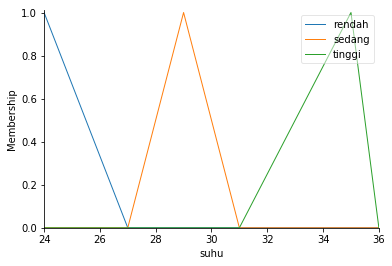

In [18]:
suhu.view()

#### gambar membership function untuk variabel input suhu

 $$ \mu Suhu (23^{\circ}C ) = a = 21^{\circ}C ; b = 24^{\circ}C ; x = 23^{\circ}C =
 \begin{cases}
    \frac{(b-x)}{(b-a)}
    =\frac{(24-23)}{(24-21)}
    =\frac{1}{3}= 0,333
\end{cases}
$$ 

E:\RAUDAH\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


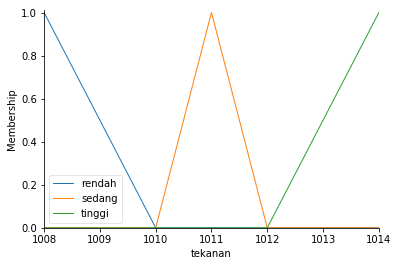

In [19]:
tekanan.view()

#### gambar membership function untuk variabel input tekanan

$$ \mu tekanan (1015) = a=1014; b=1016; x=1015 =
 \begin{cases}
    \frac{(x-a)}{(b-a)}
    =\frac{(1015-1014)}{(1016-1014)}
    =\frac{1}{2}= 0,5
\end{cases}
$$

E:\RAUDAH\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


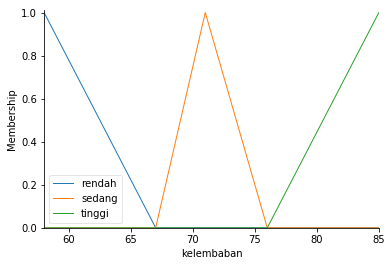

In [20]:
kelembaban.view()

#### gambar membership function untuk variabel input kelembaban

$$ \mu kelembaban (90) = a=85; b=94; x=90 =
 \begin{cases}
    \frac{(90-85)}{(94-85)}
    =\frac{(1011-1010)}{(1011-1010)}
    =\frac{5}{9} = 0,56
\end{cases}
$$

E:\RAUDAH\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


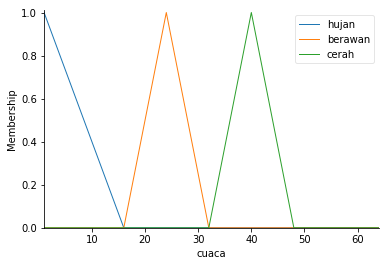

In [21]:
cuaca.view()

#### gambar membership function untuk variabel output cuaca

## RULE BASE

E:\RAUDAH\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x161eabbc2e8>)

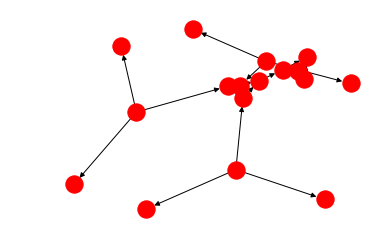

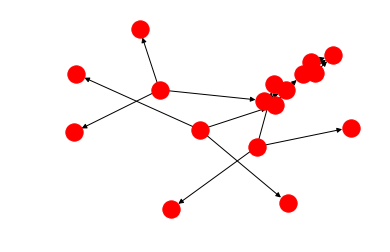

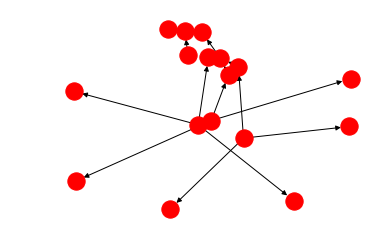

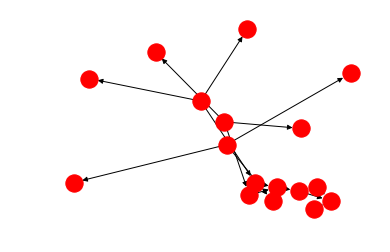

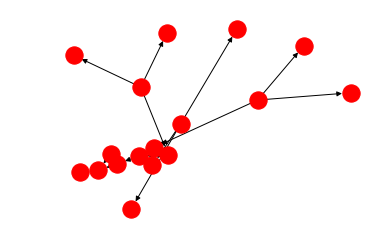

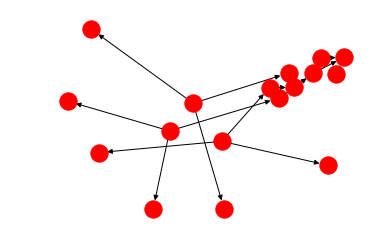

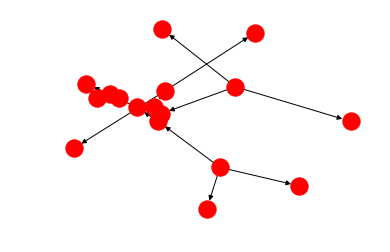

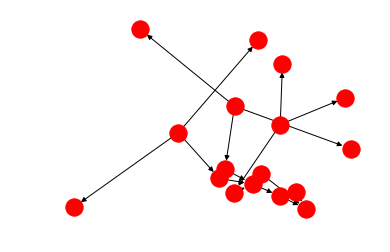

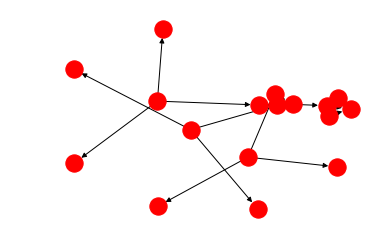

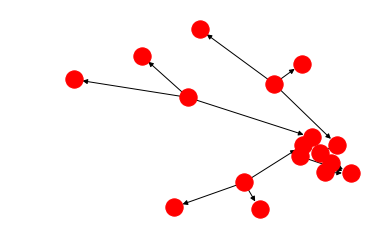

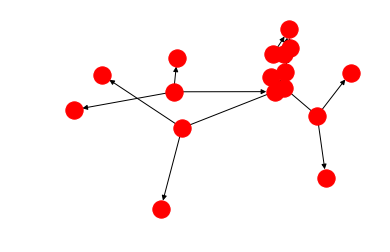

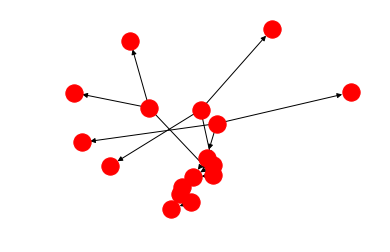

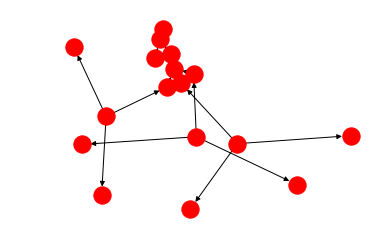

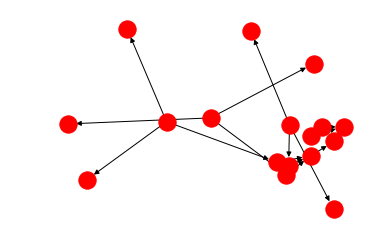

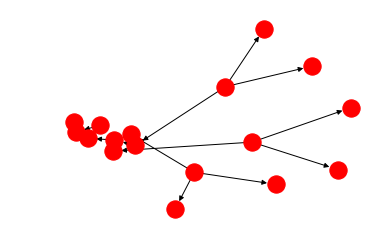

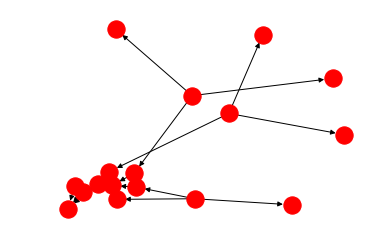

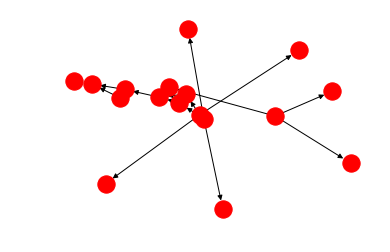

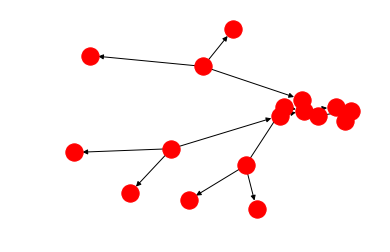

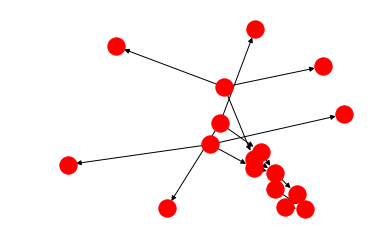

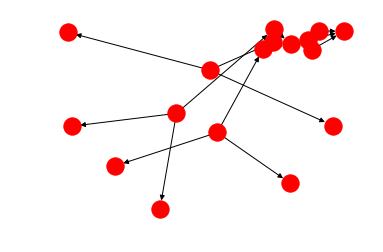

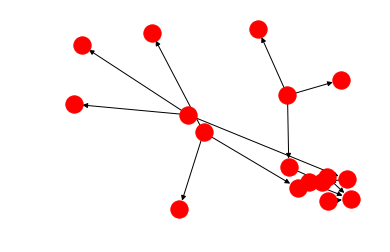

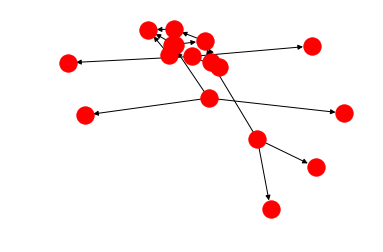

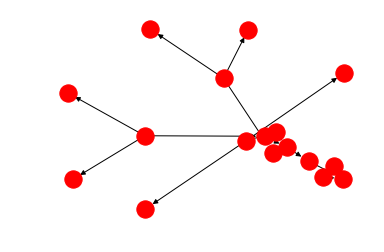

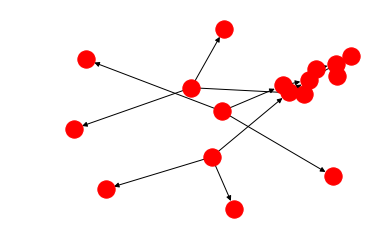

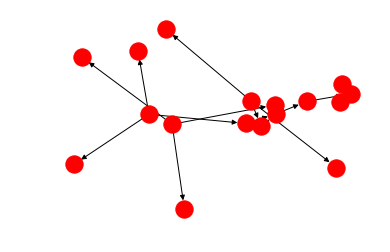

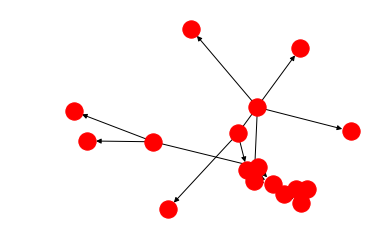

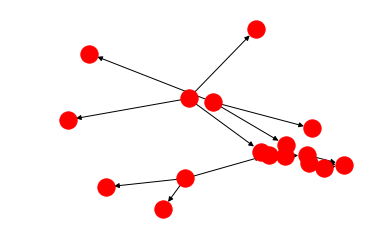

In [22]:
rule1 = ctrl.Rule(suhu['rendah'] & tekanan['rendah'] & kelembaban['rendah'], cuaca['hujan'])
rule2 = ctrl.Rule(suhu['rendah'] & tekanan['rendah'] & kelembaban['sedang'], cuaca['berawan'])
rule3 = ctrl.Rule(suhu['rendah'] & tekanan['rendah'] & kelembaban['tinggi'], cuaca['cerah'])

rule4 = ctrl.Rule(suhu['rendah'] & tekanan['sedang'] & kelembaban['rendah'], cuaca['hujan'])
rule5 = ctrl.Rule(suhu['rendah'] & tekanan['sedang'] & kelembaban['sedang'], cuaca['berawan'])
rule6 = ctrl.Rule(suhu['rendah'] & tekanan['sedang'] & kelembaban['tinggi'], cuaca['cerah'])

rule7 = ctrl.Rule(suhu['rendah'] & tekanan['tinggi'] & kelembaban['rendah'], cuaca['hujan'])
rule8 = ctrl.Rule(suhu['rendah'] & tekanan['tinggi'] & kelembaban['sedang'], cuaca['berawan'])
rule9 = ctrl.Rule(suhu['rendah'] & tekanan['tinggi'] & kelembaban['tinggi'], cuaca['cerah'])

rule10 = ctrl.Rule(suhu['sedang'] & tekanan['rendah'] & kelembaban['rendah'], cuaca['hujan'])
rule11 = ctrl.Rule(suhu['sedang'] & tekanan['rendah'] & kelembaban['sedang'], cuaca['berawan'])
rule12 = ctrl.Rule(suhu['sedang'] & tekanan['rendah'] & kelembaban['tinggi'], cuaca['cerah'])

rule13 = ctrl.Rule(suhu['sedang'] & tekanan['sedang'] & kelembaban['rendah'], cuaca['hujan'])
rule14 = ctrl.Rule(suhu['sedang'] & tekanan['sedang'] & kelembaban['sedang'], cuaca['berawan'])
rule15 = ctrl.Rule(suhu['sedang'] & tekanan['sedang'] & kelembaban['tinggi'], cuaca['cerah'])

rule16 = ctrl.Rule(suhu['sedang'] & tekanan['tinggi'] & kelembaban['rendah'], cuaca['hujan'])
rule17 = ctrl.Rule(suhu['sedang'] & tekanan['tinggi'] & kelembaban['sedang'], cuaca['berawan'])
rule18 = ctrl.Rule(suhu['sedang'] & tekanan['tinggi'] & kelembaban['tinggi'], cuaca['cerah'])

rule19 = ctrl.Rule(suhu['tinggi'] & tekanan['rendah'] & kelembaban['rendah'], cuaca['hujan'])
rule20 = ctrl.Rule(suhu['tinggi'] & tekanan['rendah'] & kelembaban['sedang'], cuaca['berawan'])
rule21 = ctrl.Rule(suhu['tinggi'] & tekanan['rendah'] & kelembaban['tinggi'], cuaca['cerah'])

rule22 = ctrl.Rule(suhu['tinggi'] & tekanan['sedang'] & kelembaban['rendah'], cuaca['hujan'])
rule23 = ctrl.Rule(suhu['tinggi'] & tekanan['sedang'] & kelembaban['sedang'], cuaca['berawan'])
rule24 = ctrl.Rule(suhu['tinggi'] & tekanan['sedang'] & kelembaban['tinggi'], cuaca['cerah'])

rule25 = ctrl.Rule(suhu['tinggi'] & tekanan['tinggi'] & kelembaban['rendah'], cuaca['hujan'])
rule26 = ctrl.Rule(suhu['tinggi'] & tekanan['tinggi'] & kelembaban['sedang'], cuaca['berawan'])
rule27 = ctrl.Rule(suhu['tinggi'] & tekanan['tinggi'] & kelembaban['tinggi'], cuaca['cerah'])

rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()
rule17.view()
rule18.view()
rule19.view()
rule20.view()
rule21.view()
rule22.view()
rule23.view()
rule24.view()
rule25.view()
rule26.view()
rule27.view()

 biasanya diterapkan pada sistem yang melibatkan seperangkat aturan buatan manusia sistem berbasis aturan yang dibangun menggunakan inferensi aturan otomatis. Mendefinisikan hubungan fuzzy antara variabel input dan output, dengan kata lain aturan-aturan ini dibentuk untuk menyatakan relasi antara input yang ada dengan output. Dari 3 input dimana masing-masing 3 input memiliki 3 kondisi , didapatkan 27 rule.

#  MEKANISME INFERENCE

In [23]:
cuaca_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, 
                                   rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, 
                                   rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27])

In [24]:
tingkat = ctrl.ControlSystemSimulation(cuaca_ctrl)

#### input
    suhu       : 26
    tekanan    : 1011
    kelembaban : 60
 
 #### metode inference
 $$ \mu Suhu Rendah (26) =
 \begin{cases}
    \frac{(b-x)}{(b-a)}
    =\frac{(27-26)}{(27-24)}
    =\frac{1}{3}= 0,333
\end{cases}
$$ 

$$ \mu tekanan sedang (1011) =
 \begin{cases}
    \frac{(x-a)}{(b-a)}
    =\frac{(1011-1010)}{(1011-1010)}
    = 1
\end{cases}
$$

 $$ \mu kelembaban Rendah (60) =
 \begin{cases}
    \frac{(b-x)}{(b-a)}
    =\frac{(67-60)}{(27-24)}
    =\frac{7}{9}= 0,777
\end{cases}
$$ 

# DEFUZIFIKASI

7.333333333333335


E:\RAUDAH\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


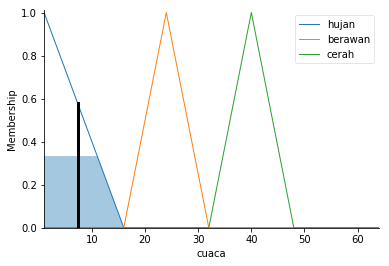

In [25]:
tingkat.input['suhu'] = 26
tingkat.input['tekanan'] = 1011
tingkat.input['kelembaban']= 60
tingkat.compute()
print (tingkat.output['cuaca'])
cuaca.view(sim=tingkat)

$$ Suhu Rendah & tekanan sedang & kelembaban rendah = hujan $$
    $$\begin{cases}
 nilai min = (0,333, 0,777, 1) = 0,333
 \end{cases}$$

$$ PERHITUNGAN : $$
$$ X1 =
  \begin{cases} 
  x1 =\frac {1}{2}(12+1) = 7
     \end{cases} $$
$$ X2 =
  \begin{cases}
  x2 = 12 +\frac {1}{3} (18-12)
     = 12+2 = 14
   \end{cases} $$
$$ A1 =
  \begin{cases}
  A1 = 12 * 0,333 = 3.996
   \end{cases} $$
$$ A2 =
  \begin{cases}
  A2 = \frac {1}{2}*6*0,333 = 0,999
  \end {cases} $$

$$ HASIL $$
 $$ \begin{cases}
 =\frac {(X1*A1) + (X2 *A2)}{(A1 + A2)}
 =\frac {(7*3.996) + (14*0.999)}{(3.996 + 0.999)}
 =\frac {(27.972 + 13.986)}{4.995} = 7.333
 \end{cases} $$